In [41]:
library(data.table)
#library(qqman)
#library(CMplot)
library(ggplot2)
library(ggrepel)

In [36]:
# Load RNA cNMF spectra
rna_spectra = data.frame(fread("../fibroblast_reanalysis_RNAseq_cNMF/results/cNMF_k17_spectra.csv", header=TRUE))
colnames(rna_spectra)[1] = "gene_symbol"
head(rna_spectra)

,gene_symbol,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AL627309.1,4.485349e-05,-1.680707e-05,2.711908e-04,1.997887e-07,-9.140902e-05,-9.808954e-05,-7.381997e-05,-6.268320e-05,-3.633258e-05,6.292237e-05,-9.241467e-06,-9.984880e-05,-5.924426e-05,-1.198333e-04,-2.798399e-05,1.071399e-04,-2.470636e-05
2,AL669831.5,-1.697107e-04,-3.563389e-05,6.446964e-04,-9.630837e-05,-1.289465e-04,-2.015122e-05,-2.225976e-04,-1.543368e-04,-1.279373e-04,-4.932020e-06,-1.586984e-05,1.102403e-04,-1.620719e-05,-2.327429e-04,3.261986e-04,7.439245e-04,-1.118246e-05
3,FAM87B,-1.807355e-05,-8.748641e-05,2.689533e-04,-8.261776e-05,-4.143518e-05,-9.672403e-05,-7.154163e-05,6.920848e-05,-2.496312e-05,1.567523e-04,3.548425e-05,3.772697e-05,-7.325861e-05,4.441635e-05,-4.668193e-05,5.473440e-05,-8.926566e-05
4,LINC00115,-1.900908e-04,2.566267e-05,5.405301e-04,-1.569890e-04,-1.337640e-04,-1.078063e-04,-1.092501e-04,9.748622e-05,-1.121921e-04,1.944148e-04,5.504398e-05,-2.010044e-04,-6.443721e-05,-1.450158e-04,2.775289e-04,-1.975113e-06,2.544851e-07
5,FAM41C,-2.134161e-04,2.391466e-05,2.922115e-05,-4.882318e-05,1.211709e-04,2.003466e-05,-1.004547e-04,-1.544578e-04,-1.514857e-04,6.953128e-05,2.838061e-04,1.150518e-04,4.878670e-06,-9.803116e-05,2.850981e-04,3.000089e-04,2.977847e-04
6,AL645608.3,-5.969878e-05,1.355644e-04,2.020424e-04,-4.142724e-05,-1.115866e-04,-9.989469e-05,-6.750025e-05,-3.853746e-05,-5.470746e-05,1.035167e-04,-1.153514e-04,1.628124e-04,6.535534e-05,-4.376136e-05,-5.488670e-05,-2.537307e-05,-4.718835e-05


In [37]:
# Load ATAC cNMF spectra
atac_spectra = fread("../fibroblast_reanalysis_ATACseq_cNMF/data/ATACseq_cNMF_spectrum_k14.csv")
colnames(atac_spectra)[1] = "index"
colnames(atac_spectra) = make.names(colnames(atac_spectra))
head(atac_spectra)

index,chr,bp_from,bp_to,gene_symbol,peak_anno,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"chr1:827241-827741,LINC00115,Promoter",chr1,827241,827741,LINC00115,Promoter,1.189731e-04,4.412841e-05,4.629999e-05,1.688904e-05,1.347588e-04,0.0004292274,6.119025e-05,1.280712e-04,0.0001242130,1.104011e-04,8.167751e-05,1.376169e-04,9.262477e-05,8.968862e-05
"chr1:943047-943547,NOC2L,Exonic",chr1,943047,943547,NOC2L,Exonic,0.000000e+00,1.273776e-05,2.829282e-05,1.524339e-04,0.000000e+00,0.0003908571,6.842473e-05,6.825709e-05,0.0001565534,2.432080e-04,4.880992e-05,1.770068e-04,2.529705e-05,1.125049e-04
"chr1:978274-978774,PERM1,Intronic",chr1,978274,978774,PERM1,Intronic,2.937313e-05,0.000000e+00,1.543088e-05,2.008301e-06,1.644699e-04,0.0002718790,0.000000e+00,1.296211e-04,0.0001464790,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
"chr1:981361-981861,PERM1,Intronic",chr1,981361,981861,PERM1,Intronic,0.000000e+00,0.000000e+00,1.935403e-05,6.241323e-05,6.887718e-05,0.0003250345,0.000000e+00,1.408513e-04,0.0001555761,0.000000e+00,1.349624e-06,0.000000e+00,0.000000e+00,0.000000e+00
"chr1:982564-983064,PERM1,Promoter",chr1,982564,983064,PERM1,Promoter,0.000000e+00,0.000000e+00,0.000000e+00,4.291780e-05,3.985339e-05,0.0002723543,0.000000e+00,1.475194e-04,0.0001868122,0.000000e+00,1.089465e-05,0.000000e+00,0.000000e+00,0.000000e+00
"chr1:984074-984574,PERM1,Distal",chr1,984074,984574,PERM1,Distal,3.966115e-05,0.000000e+00,2.430377e-05,7.229034e-05,1.370703e-04,0.0004259023,0.000000e+00,2.088489e-04,0.0002453266,1.315575e-05,4.373033e-05,3.561041e-05,0.000000e+00,1.414113e-05


In [38]:
d = merge(rna_spectra, atac_spectra, by="gene_symbol", suffixes=c(".RNA", ".ATAC"), all=TRUE)

In [39]:
colnames(d)

[1] "gene_symbol" "X1.RNA"      "X2.RNA"      "X3.RNA"      "X4.RNA"     
 [6] "X5.RNA"      "X6.RNA"      "X7.RNA"      "X8.RNA"      "X9.RNA"     
[11] "X10.RNA"     "X11.RNA"     "X12.RNA"     "X13.RNA"     "X14.RNA"    
[16] "X15"         "X16"         "X17"         "index"       "chr"        
[21] "bp_from"     "bp_to"       "peak_anno"   "X1.ATAC"     "X2.ATAC"    
[26] "X3.ATAC"     "X4.ATAC"     "X5.ATAC"     "X6.ATAC"     "X7.ATAC"    
[31] "X8.ATAC"     "X9.ATAC"     "X10.ATAC"    "X11.ATAC"    "X12.ATAC"   
[36] "X13.ATAC"    "X14.ATAC"

In [74]:
max(d$X1.ATAC, na.rm=TRUE)
max(d$X7.RNA, na.rm=TRUE)

[1] 0.0007909039

[1] 0.008731168

In [105]:
d$show_gene_symbol = NA

#top_k = 60
top_k = 100

idx = order(d$X1.ATAC * 5 + d$X7.RNA, decreasing=TRUE)[1:top_k]

d$show_gene_symbol[idx] = d$gene_symbol[idx]

In [106]:
length(unique(d$gene_symbol[idx]))

[1] 77

In [107]:
idx

[1]  8701 15002  4524  4523 19604 16018 16019 23843 19603 23842 20448 15294
 [13]  8878 15023 23879  3109  3110 17947 15269  8879  8880  8881 15275 15270
 [25] 19362  8685 18497 19723 23046 16195 15274 23054  3905  1859 18495 15271
 [37] 15272 19084 15700  2775 15021 22169  3306 19724 15414  8875 13327 21170
 [49]  2916  3904  5098  5087  8199 18632 15273 15296 17045  3827  7358 18186
 [61]  3834  1994 22142 23876 13615 20170  8797 22289 15963  1760  5108 17269
 [73] 19467  3548 16194 16971 19875  4494 16196 19267  1759 22250  3220 10429
 [85]  3362 23878  1788  8335  9079  5485 13839 17910 19286 10616  6606 12026
 [97] 16662 21314 20229 15297

Warning message:
“Removed 16846 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 24874 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 16846 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 24874 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 24 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


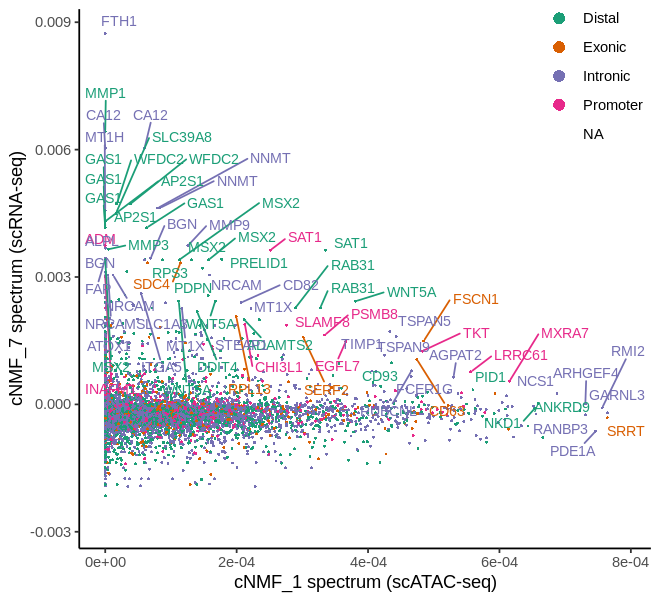

In [111]:
width = 5.5
height = 5
options(repr.plot.width=width, repr.plot.height=height)

ggplot(d, aes(x=X1.ATAC, y=X7.RNA, col=peak_anno, label=show_gene_symbol)) +
    geom_point(size=0.5, pch=16) +
    geom_text_repel(max.overlaps=20, size=3) +

    theme_classic() +
    #theme_minimal() +
    #scale_color_manual() +
    scale_color_brewer(palette="Dark2") +
    #scale_color_brewer(palette="Set1") +

    xlab("cNMF_1 spectrum (scATAC-seq)") +
    ylab("cNMF_7 spectrum (scRNA-seq)") +
    theme(legend.position=c(0.9, 0.9)) +  # top-right corder
    guides(color = guide_legend(override.aes = list(size=3)))  # legend point size

ggsave("plots/ATAC_RNA_cNMF_spectra_v2.pdf", width=width, height=height)

In [32]:
cor.test(d$X7.RNA, d$X1.ATAC)


	Pearson's product-moment correlation

data:  d$X7.RNA and d$X1.ATAC
t = -0.64315, df = 8126, p-value = 0.5201
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.02887044  0.01460819
sample estimates:
         cor 
-0.007134501 
